In [1]:
import sys
sys.path.insert(0, "../../python")

import os
import numpy as np
from vsim import plot
from vsim import load
from vsim import analyze
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
from scipy.optimize import curve_fit
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]
c = const.physical_constants['speed of light in vacuum'][0]

pathPre = '/mnt/md0/VSim/Matched_Accelerating_Gradient/Witness_Beam_Delay/5e16PlasmaDensity/'
simName = 'AccelGradient'

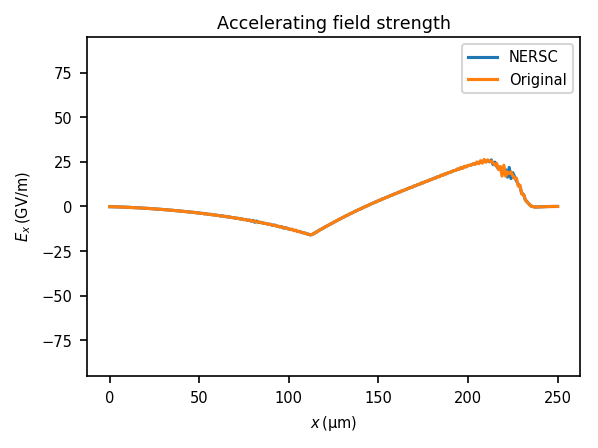

In [4]:
# Lets look at the difference in wake loading
# Same thing for the shorter propagation distance
path = '/mnt/md0/VSim/Matched_Accelerating_Gradient/TestNERSC/'
Efield, Eattrs = load.load_field(path, simName, 'edgeE')
Nx, Ny, Nz = analyze.get_shape(Efield[2])
x = np.linspace(0, 250, Nx)

pathPre = '/mnt/md0/VSim/Matched_Accelerating_Gradient/Witness_Beam_Delay/5e16PlasmaDensity_18umWitness/'
path = pathPre + '135um/'
Efield18, Eattrs = load.load_field(path, simName, 'edgeE')
Nx, Ny, Nz = analyze.get_shape(Efield[2])
x = np.linspace(0, 250, Nx)

plt.figure(figsize=(4,3), dpi=150)
gs = gridspec.GridSpec(1, 1)
plt.subplot(gs[0, 0])
plt.plot(x, Efield[2][:, int((Ny+1)/2), int((Nz+1)/2), 0]/1e9)
plt.plot(x, Efield18[2][:, int((Ny+1)/2), int((Nz+1)/2), 0]/1e9)
plt.title('Accelerating field strength')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E_x\,(\mathrm{GV/m})$')
plt.legend([r'NERSC', r'Original'])
plt.ylim([-95, 95])
plt.tight_layout()
plt.show()